In [1]:
import requests
import pandas as pd
import csv, re, sys, os

In [2]:
# Find the series id and text name.
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/Dataflow/'
seriesids = requests.get(url).json()
df = pd.DataFrame(seriesids['Structure']['Dataflows']['Dataflow'])
print(len(df))
for x in range(0, 83):
     items = (str(df['@id'][x]), str(df['Name'][x]['#text']))
     print(': '.join(items))

83
DS-FAS: Financial Access Survey (FAS)
DS-IFS: International Financial Statistics (IFS)
DS-MCDREO: Middle East and Central Asia Regional Economic Outlook (MCDREO)
DS-DOT: Direction of Trade Statistics (DOTS)
DS-CDIS: Coordinated Direct Investment Survey (CDIS)
DS-GFS01M: Government Finance Statistics (GFS 2001) - Multidimensional
DS-GFS01: Government Finance Statistics (GFS 2001)
DS-BOP: Balance of Payments (BOP)
DS-BOPAGG: Balance of Payments (BOP), World and Regional Aggregates
DS-CPIS: Coordinated Portfolio Investment Survey (CPIS)
DS-APDREO: Asia and Pacific Regional Economic Outlook (APDREO)
DS-FM: Fiscal Monitor (FM)
DS-AFRREO: Sub-Saharan Africa Regional Economic Outlook (AFRREO)
DS-MCDREO201410: MCD Regional Economic Outlook October 2014
DS-FM201410: Fiscal Monitor (FM) October 2014
DS-AFRREO201410: Sub-Saharan Africa Regional Economic Outlook (AFRREO) October 2014
DS-MCDREO201501: MCD Regional Economic Outlook January 2015
DS-APDREO201410: Asia and Pacific Regional Economic 

In [23]:
# Annotations for the series
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/PGI"
dotstruct = requests.get(url).json()
df = pd.DataFrame(dotstruct['Structure']['KeyFamilies']\
     ['KeyFamily']['Annotations'])
print(len(df))
for x in range(0, 4): 
     items = (str(df['Annotation'][x]['AnnotationTitle']), \
     str(df['Annotation'][x]['AnnotationText']['#text']))
     print(': '.join(items))

4
Latest Update Date: 04/14/2017
Name: Principal Global Indicators (PGI)
Code: PGI
Definition: The Principal Global Indicators (PGI) dataset provides internationally comparable data for the Group of 20 economies (G-20) and economies with systemically important financial sectors that are not members of the G-20. The PGI facilitates the monitoring of economic and financial developments for these jurisdictions. Launched in 2009, the PGI website is hosted by the IMF and is a joint undertaking of the Inter-Agency Group of Economic and Financial Statistics (IAG).  


In [40]:
# Look at structure of IFS data to find the dimensions for our data request
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/PGI"
dotstruct = requests.get(url).json()
df = pd.DataFrame(dotstruct['Structure']['KeyFamilies']['KeyFamily']\
          ['Components']['Dimension'])
print(len(df))
for x in range(0, 3): 
     items = ("Dimension", str(x+1), str(df['@codelist'][x]))
     print(': '.join(items))

3
Dimension: 1: CL_FREQ
Dimension: 2: CL_AREA_PGI
Dimension: 3: CL_INDICATOR_PGI


In [41]:
# Obtain country codes
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_AREA_PGI"
country = requests.get(url).json()
df = pd.DataFrame(country['Structure']['CodeLists']['CodeList']['Code'])
print(len(df))
for x in range(0, len(df)): 
     items = (str(df['@value'][x]), str(df['Description'][x]['#text']))
        
     print(': '.join(items))

89
AF: Afghanistan
DZ: Algeria
AR: Argentina
AM: Armenia
AU: Australia
AT: Austria
BY: Belarus
BE: Belgium
BT: Bhutan
BA: Bosnia and Herzegovina
BR: Brazil
BN: Brunei Darussalam
BG: Bulgaria
CA: Canada
CL: Chile
HK: Hong Kong, China
CN: China
CO: Colombia
CR: Costa Rica
HR: Croatia
CY: Cyprus
CZ: Czech Republic
DK: Denmark
EC: Ecuador
SV: El Salvador
EE: Estonia
U2: Euro area (Member States and Institutions of the Euro Area) changing composition
FI: Finland
FR: France
GE: Georgia
DE: Germany
GR: Greece
HN: Honduras
HU: Hungary
IN: India
ID: Indonesia
IE: Ireland
IL: Israel
IT: Italy
JP: Japan
KZ: Kazakhstan
KE: Kenya
KR: Korea, Republic of
XK: Kosovo
LV: Latvia
LB: Lebanon
LT: Lithuania
LU: Luxembourg
MK: Macedonia, The Former Yugoslav Republic of
MY: Malaysia
MT: Malta
MU: Mauritius
MX: Mexico
MD: Moldova, Republic of
NL: Netherlands
NO: Norway
PK: Pakistan
PY: Paraguay
PE: Peru
PH: Philippines
PL: Poland
PT: Portugal
RO: Romania
RU: Russian Federation
SA: Saudi Arabia
SC: Seychelles


In [43]:
def check_codes(item_code):
    #no_list = ['1C_473','1C_459','CS','1C_568','PM','SH','1C_356','5H','7B','x0','1E','1C_977','4F','U2','5I','CSH','1C_355','1C_752','R1','5B','5W','5M','YUC']
    no_list = ['U2','1C_PGI_Countries_Group','1C_ALLC','1C_ALL','R22','1C_PGI_Euro_Group','W00','1C_ALLG']
    if item_code in no_list:
        return False
    else:
        return True
    
all_names = []
all_codes = []
#print(len(df))
for x in range(0, len(df)):
    item_code = str(df['@value'][x])
    item_name = str(df['Description'][x]['#text'])
    if check_codes(item_code):
        all_names.append(item_name)
        all_codes.append(item_code)
    else:
        pass
print(len(all_names))
print(len(all_codes))

81
81


In [46]:
url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_INDICATOR_PGI"
series = requests.get(url).json()
df = pd.DataFrame(series['Structure']['CodeLists']['CodeList']['Code'])
all_inds = []
all_cinds = []
for x in range(0, len(df)):
    all_cinds.append(str(df['@value'][x]))
    all_inds.append(str(df['Description'][x]['#text']))

In [28]:
len(all_codes)

81

In [13]:
our = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/PGI/A.RU.NGDP_PC_CP_A_PT?startPeriod=2008&endPeriod=2016'
#NGDP_USD
#NGDP_PC_CP_A_PT
odata = requests.get(our)
my_data = odata.json()
unempl = pd.DataFrame(my_data['CompactData']['DataSet']['Series']['Obs'])
print(unempl)
unempl.tail()


          @OBS_VALUE @TIME_PERIOD
0   27.4206787752764         2008
1  -5.68287793189596         2009
2   18.2899717482477         2010
3   20.4621971869322         2011
4   11.7844129829232         2012
5   6.45687073965926         2013
6   7.30467691585311         2014
7    14.856977145577         2015


,@OBS_VALUE,@TIME_PERIOD
3,20.4621971869322,2011
4,11.7844129829232,2012
5,6.45687073965926,2013
6,7.30467691585311,2014
7,14.856977145577,2015


In [14]:
all_cou = '+'.join(all_codes)
print(all_cou)

AF+DZ+AR+AM+AU+AT+BY+BE+BT+BA+BR+BN+BG+CA+CL+HK+CN+CO+CR+HR+CY+CZ+DK+EC+SV+EE+FI+FR+GE+DE+GR+HN+HU+IN+ID+IE+IL+IT+JP+KZ+KE+KR+XK+LV+LB+LT+LU+MK+MY+MT+MU+MX+MD+NL+NO+PK+PY+PE+PH+PL+PT+RO+RU+SA+SC+SG+SK+SI+ZA+ES+LK+SE+CH+TR+UG+UA+GB+US+UY+UZ+PS


In [17]:


#our='http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/A.'+all_cou+'.LUR_PT?startPeriod=2008&endPeriod=2016'
#our = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/A.US+AU+GB.LUR_PT?startPeriod=2008&endPeriod=2016'
#print(our)
def obtain_dataframe(query_ind):
    our ='http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/PGI/A.AF+DZ+AR+AM+AU+AT+BY+BE+BT+BA+BR+BN+BG+CA+CL+HK+CN+CO+CR+HR+CY+CZ+DK+EC+SV+EE+FI+FR+GE+DE+GR+HN+HU+IN+ID+IE+IL+IT+JP+KZ+KE+KR+XK+LV+LB+LT+LU+MK+MY+MT+MU.'+query_ind+'?startPeriod=2008&endPeriod=2016'
    our2 ='http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/PGI/A.MX+MD+NL+NO+PK+PY+PE+PH+PL+PT+RO+RU+SA+SC+SG+SK+SI+ZA+ES+LK+SE+CH+TR+UG+UA+GB+US+UY+UZ+PS.'+query_ind+'?startPeriod=2008&endPeriod=2016'
    #our3 = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/IFS/A.NA+NR+NP+NL+AN+NZ+NI+NE+NG+NO+OM+PK+PW+PA+PG+PY+PE+PH+PL+PT+QA+RE+RO+RU+RW+WS+SM+ST+SA+SN+RS+SC+SL+SG+SX+SK+SI+SB+SO+ZA+SS+ES+LK+KN+LC+VC+SD+SR+SZ+SE+CH+SY+TW+TJ+TZ+TH+TP+TL+TG+TO+TT+TN+TR+TM+TV+UG+UA+AE+GB+US+UY+UZ+VU+VE+VN+PS+YE+ZM+ZW.'+query_ind+'?startPeriod=2008&endPeriod=2016'
    odata = requests.get(our)
    my_data = odata.json()
    listing1 = my_data['CompactData']['DataSet']['Series']
    odata = requests.get(our2)
    my_data = odata.json()
    listing2 = my_data['CompactData']['DataSet']['Series']
    #odata = requests.get(our3)
    #my_data = odata.json()
    #listing3 = my_data['CompactData']['DataSet']['Series']
    listing = listing1 + listing2 # + listing3
    print(len(listing))
    print(listing[0])
    countries= []
    indicators=[]
    vals = []
    years = []
    for i in range(0, len(listing)):
        country = listing[i]['@REF_AREA']
        indicator =listing[i]['@INDICATOR']
        item = listing[i]
        if 'Obs' in item:
            obs = item['Obs']
            if isinstance(obs, dict):
                val = obs['@OBS_VALUE']
                year = obs['@TIME_PERIOD']
                countries.append(country)
                indicators.append(indicator)
                years.append(year)
                vals.append(val)
            else:
                for x in range(0,len(obs)):
                    if '@OBS_VALUE' in obs[x]:
                        val = obs[x]['@OBS_VALUE']
                    else:
                        val = 'none'
                    if '@TIME_PERIOD' in obs[x]:
                        year = obs[x]['@TIME_PERIOD']
                    else:
                        year = 'none'
                        countries.append(country)
                        indicators.append(indicator)
                        years.append(year)
                        vals.append(val)
            df = pd.DataFrame({'Country': countries, 'Indicator': indicators, 'Year': years, 'Value': vals})
        else:
            countries.append(country)
            indicators.append(indicator)
            years.append('missing')
            vals.append('missing')
    #df = pd.DataFrame({'Country': countries, 'Indicator': indicators, 'Year': years, 'Value': vals})
    print(df.tail())
    return df

#del countries, indicators, years, vals

In [18]:
query_inds = ['NGDP_PC_PP_PT','NGDP_PC_CP_A_PT','NGDP_USD']
path1 = '/Users/dariaulybina/Desktop/georgetown/global-economics/additional_data/data_csv/'
for query_ind in query_inds:
    df = obtain_dataframe(query_ind)
    df.to_csv(os.path.join(path1,'PGI_'+query_ind+'.csv'))
              

16
{'@REF_AREA': 'KR', '@TIME_FORMAT': 'P1Y', '@UNIT_MULT': '0', 'Obs': [{'@OBS_VALUE': '5.86953675304417', '@TIME_PERIOD': '2008'}, {'@OBS_VALUE': '4.27486948300767', '@TIME_PERIOD': '2009'}, {'@OBS_VALUE': '9.86363034095975', '@TIME_PERIOD': '2010'}, {'@OBS_VALUE': '5.32463242151318', '@TIME_PERIOD': '2011'}, {'@OBS_VALUE': '3.35982129256739', '@TIME_PERIOD': '2012'}, {'@OBS_VALUE': '3.77425294021946', '@TIME_PERIOD': '2013'}, {'@OBS_VALUE': '3.96194915874366', '@TIME_PERIOD': '2014'}, {'@OBS_VALUE': '4.8794300546411', '@TIME_PERIOD': '2015'}], '@INDICATOR': 'NGDP_PC_PP_PT', '@FREQ': 'A'}
  Country      Indicator    Value     Year
0      FI  NGDP_PC_PP_PT  missing  missing
1      DK  NGDP_PC_PP_PT  missing  missing
2      PL  NGDP_PC_PP_PT  missing  missing
3      NO  NGDP_PC_PP_PT  missing  missing
16
{'@REF_AREA': 'BR', '@TIME_FORMAT': 'P1Y', '@UNIT_MULT': '0', 'Obs': [{'@OBS_VALUE': '13.9350269210087', '@TIME_PERIOD': '2008'}, {'@OBS_VALUE': '6.83334838487615', '@TIME_PERIOD': '20

In [11]:
df.to_csv('/Users/dariaulybina/Desktop/georgetown/global-economics/additional_data/data/.csv')

In [45]:
def find_name(code, list1, list2):
    for i,j in zip(all_names,all_codes):
        if ccode in j:
            cname = i
            return cname
        else:
            continue

In [50]:
cyear = ['2008','2009','2010','2011','2012','2013','2014','2015','2016']
cnames = 9*all_names
ccodes = 9*all_codes
all_years = len(all_names)*cyear
print(len(all_years))
print(len(cnames))
print(len(ccodes))

729
729
729


In [48]:
#dates = pd.date_range('2008', '2016', freq='A')
#table = OrderedDict(()
   # ('CName', cnames),
   ## ('CCode',),
   # ('',  ),
   # ('',  )
#))
#d = DataFrame(table)

DatetimeIndex(['2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [58]:
#Create empty dataframe with desired values
import numpy as np
#dummyarray = np.empty((4,1))
#dummyarray[:] = np.nan

index = pd.date_range('2008', '2016', freq='A')
df = pd.DataFrame(np.nan, index = index,columns=all_codes)
print(df.head())
df2 = pd.pivot_table(df,index=all_codes)
print(df2.head())

            AF  DZ  AR  AM  AU  AT  BY  BE  BT  BA ...  SE  CH  TR  UG  UA  \
2008-12-31 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN   
2009-12-31 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN   
2010-12-31 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN   
2011-12-31 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN   
2012-12-31 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ... NaN NaN NaN NaN NaN   

            GB  US  UY  UZ  PS  
2008-12-31 NaN NaN NaN NaN NaN  
2009-12-31 NaN NaN NaN NaN NaN  
2010-12-31 NaN NaN NaN NaN NaN  
2011-12-31 NaN NaN NaN NaN NaN  
2012-12-31 NaN NaN NaN NaN NaN  

[5 rows x 81 columns]


DataError: No numeric types to aggregate

In [20]:
query = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/PGI/A.AF+DZ+AR+AM+AU+AT+BY+BE+BT+BA+BR+BN+BG+CA+CL+HK+CN+CO+CR+HR+CY+CZ+DK+EC+SV+EE+FI+FR+GE+DE+GR+HN+HU+IN+ID+IE+IL+IT+JP+KZ+KE+KR+XK+LV+LB+LT+LU+MK+MY+MT+MU+MX+MD+NL+NO+PK+PY+PE+PH+PL+PT+RO+RU+SA+SC+SG+SK+SI+ZA+ES+LK+SE+CH+TR+UG+UA+GB+US+UY+UZ+PS.NGDP_PC_CP_A_PT?startPeriod=2008&endPeriod=2016'
odata = requests.get(query)
my_data = odata.json()
data = pd.DataFrame(my_data['CompactData']['DataSet']['Series'])
ccode = data['@REF_AREA']
cname = find_name(ccode, all_names,all_codes)
icode = data['@INDICATOR']
iname = find_name(icode, all_inds, all_cinds)
if isinstance(data['Obs'],list):
    for d in data['Obs']:
        vals = d['@OBS_VALUE']
        year = d['@TIME_PERIOD']
elif isinstance(data['Obs'],str):
    vals = data['Obs']
    year = 
df = pd.DataFrame({'CNAME': ccode,'':, 'Indicator': indicators, 'Year': years, 'Value': vals})
print(data)

   @FREQ       @INDICATOR @REF_AREA @TIME_FORMAT @UNIT_MULT  \
0      A  NGDP_PC_CP_A_PT        SE          P1Y          0   
1      A  NGDP_PC_CP_A_PT        BR          P1Y          0   
2      A  NGDP_PC_CP_A_PT        SG          P1Y          0   
3      A  NGDP_PC_CP_A_PT        CN          P1Y          0   
4      A  NGDP_PC_CP_A_PT        SA          P1Y          0   
5      A  NGDP_PC_CP_A_PT        HK          P1Y          0   
6      A  NGDP_PC_CP_A_PT        IN          P1Y          0   
7      A  NGDP_PC_CP_A_PT        TR          P1Y          0   
8      A  NGDP_PC_CP_A_PT        RU          P1Y          0   
9      A  NGDP_PC_CP_A_PT        KR          P1Y          0   
10     A  NGDP_PC_CP_A_PT        ID          P1Y          0   
11     A  NGDP_PC_CP_A_PT        AR          P1Y          0   
12     A  NGDP_PC_CP_A_PT        DK          P1Y          0   
13     A  NGDP_PC_CP_A_PT        NO          P1Y          0   
14     A  NGDP_PC_CP_A_PT        PL          P1Y       

,@FREQ,@INDICATOR,@REF_AREA,@TIME_FORMAT,@UNIT_MULT,Obs
11,A,NGDP_PC_CP_A_PT,AR,P1Y,0,"[{'@OBS_VALUE': '28.1685062630473', '@TIME_PER..."
12,A,NGDP_PC_CP_A_PT,DK,P1Y,0,NaN
13,A,NGDP_PC_CP_A_PT,NO,P1Y,0,NaN
14,A,NGDP_PC_CP_A_PT,PL,P1Y,0,NaN
15,A,NGDP_PC_CP_A_PT,FI,P1Y,0,NaN


In [16]:


# Rename columns
unempl.columns = ['Indicator','date']

# Set the unemployment series as a float (rather than string)
unempl.unempl = unempl.unempl.astype(float)

# Read the dates as quarters and set as the dataframe index
rng = pd.date_range(pd.to_datetime(unempl.date[0]), periods=len(unempl.index), freq='A')
unempl = unempl.set_index(pd.DatetimeIndex(rng))
#del auxp['date']

# Show last five rows
print(unempl.tail())

            unempl  date
2012-12-31     8.1  2012
2013-12-31     7.4  2013
2014-12-31     6.2  2014
2015-12-31     5.3  2015
2016-12-31     4.9  2016


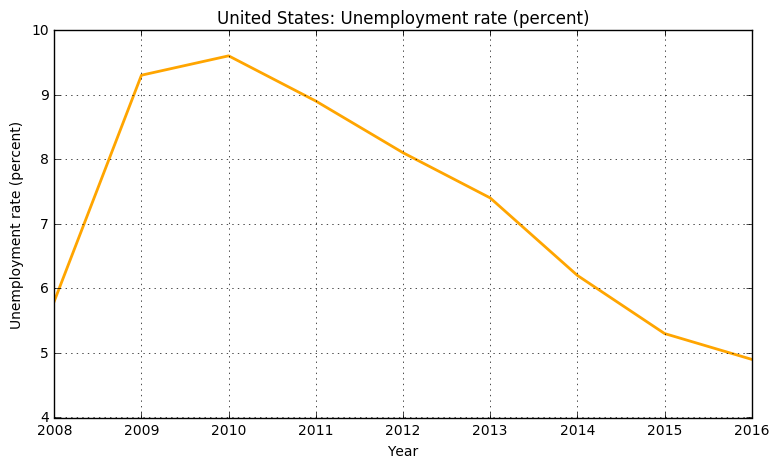

In [17]:
# import matplotlib and pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Create line plot and add labels and title
unempl.unempl.plot(grid=True, figsize=(9, 5), color="orange", linewidth=2,)
plt.ylabel('Unemployment rate (percent)')
plt.xlabel('Year')
plt.title('United States: Unemployment rate (percent)');